### Logistic Regression ###

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [5]:
df[df.columns[0]].unique()

array([ 1.,  2.,  3., nan])

In [6]:
df[df.columns[3]].unique()

array(['female', 'male', nan], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [8]:
df['age'].isnull() # get the exact rows later

0       False
1       False
2       False
3       False
4       False
        ...  
1305     True
1306    False
1307    False
1308    False
1309     True
Name: age, Length: 1310, dtype: bool

### Exploratory Data Analysis
#### Missing Data

In [9]:
df.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


<Axes: >

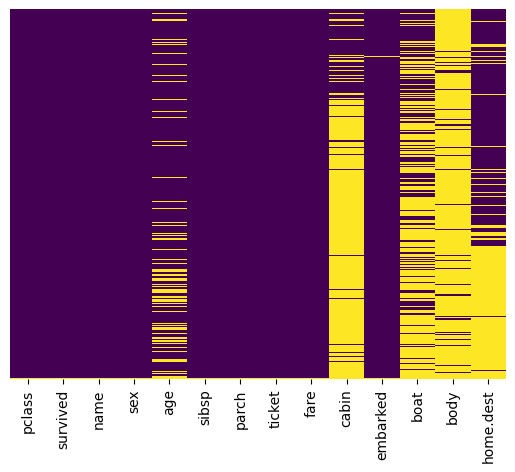

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='survived', ylabel='count'>

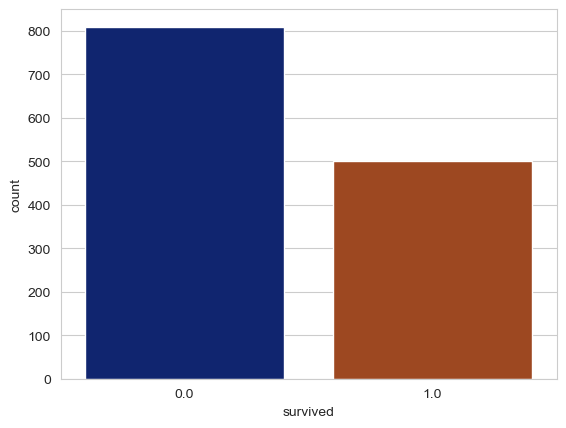

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived', data=df, palette='dark')

<Axes: xlabel='survived', ylabel='count'>

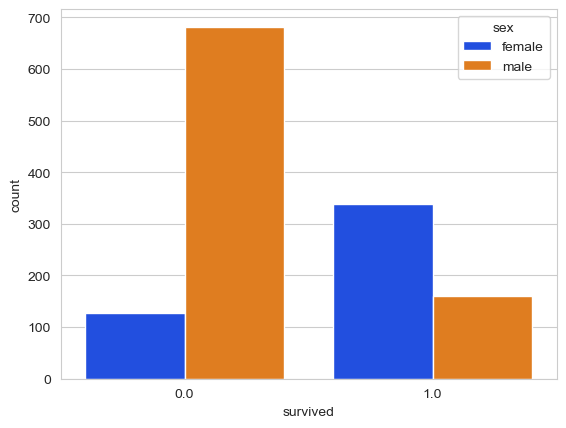

In [12]:
sns.countplot(x = 'survived', hue='sex', data=df, palette='bright')

<Axes: xlabel='survived', ylabel='count'>

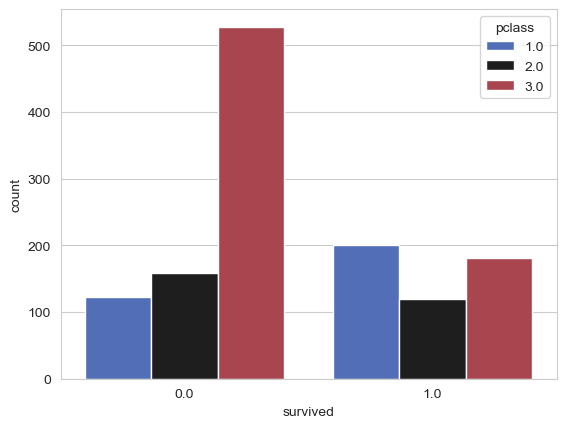

In [13]:
sns.countplot(x = 'survived', hue='pclass', data=df, palette='icefire')

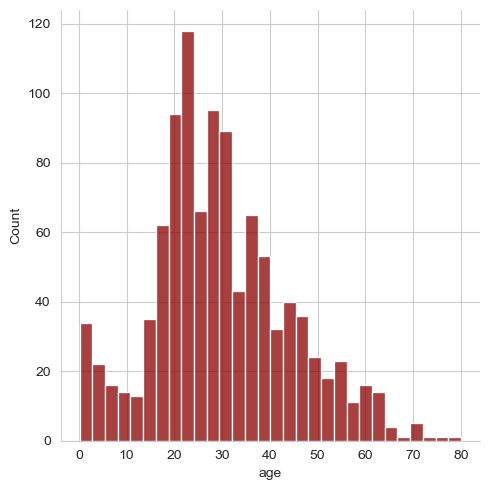

In [14]:
sns.displot(df['age'].dropna(), kde = False, color = 'darkred', bins = 30)

<Axes: xlabel='sibsp', ylabel='count'>

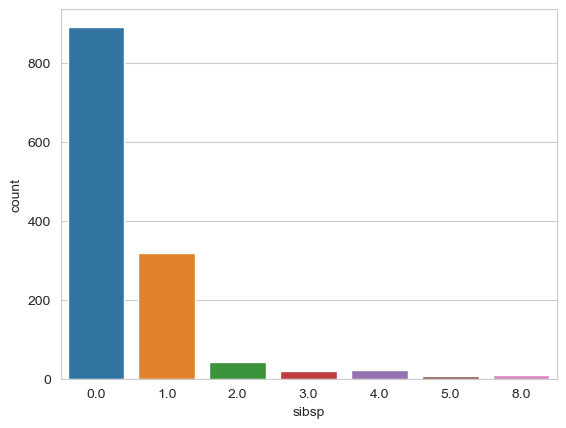

In [15]:
sns.countplot(x='sibsp', data = df)

### Data Cleaning
#### . Fill in missing age

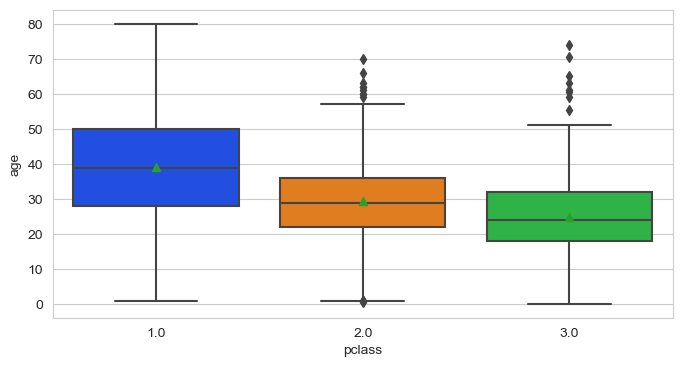

In [16]:
plt.figure(figsize=(8,4))
box_plot = sns.boxplot(x = 'pclass', y = 'age', data = df, palette = 'bright', showmeans = True)

In [17]:
#help(boxplot)

In [18]:
def imput_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 39
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [19]:
df['age'] = df[['age', 'pclass']].apply(imput_age, axis = 1)

In [20]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

<Axes: >

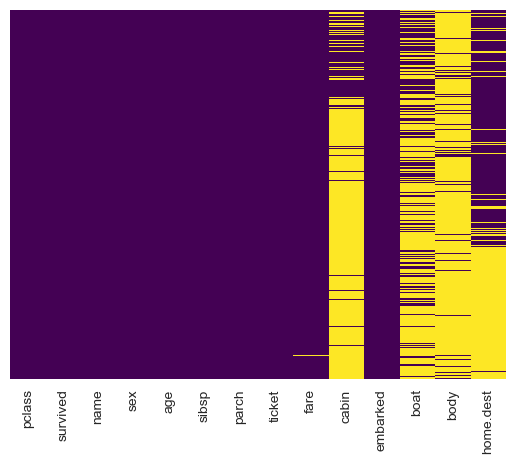

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
gender = pd.get_dummies(df['sex'], drop_first=True)
embarked = pd.get_dummies(df['embarked'], drop_first=True)

In [23]:
df['sex']

0       female
1         male
2       female
3         male
4       female
         ...  
1305    female
1306      male
1307      male
1308      male
1309       NaN
Name: sex, Length: 1310, dtype: object

In [24]:
gender

,male
0,0
1,1
2,0
3,1
4,0
...,...
1305,0
1306,1
1307,1
1308,1


In [25]:
df['embarked']

0         S
1         S
2         S
3         S
4         S
       ... 
1305      C
1306      C
1307      C
1308      S
1309    NaN
Name: embarked, Length: 1310, dtype: object

In [26]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [27]:
embarked

,Q,S
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1305,0,0
1306,0,0
1307,0,0
1308,0,1


In [28]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [29]:
df.drop(['name', 'sex', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest', 'embarked'], inplace = True, axis = 1)

In [30]:
df.head()

,pclass,survived,age,sibsp,parch
0,1.0,1.0,29.0000,0.0,0.0
1,1.0,1.0,0.9167,1.0,2.0
2,1.0,0.0,2.0000,1.0,2.0
3,1.0,0.0,30.0000,1.0,2.0
4,1.0,0.0,25.0000,1.0,2.0


In [31]:
df = pd.concat([df, gender, embarked], axis = 1)

In [32]:
df.head()

,pclass,survived,age,sibsp,parch,male,Q,S
0,1.0,1.0,29.0000,0.0,0.0,0,0,1
1,1.0,1.0,0.9167,1.0,2.0,1,0,1
2,1.0,0.0,2.0000,1.0,2.0,0,0,1
3,1.0,0.0,30.0000,1.0,2.0,1,0,1
4,1.0,0.0,25.0000,1.0,2.0,0,0,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   age       1310 non-null   float64
 3   sibsp     1309 non-null   float64
 4   parch     1309 non-null   float64
 5   male      1310 non-null   uint8  
 6   Q         1310 non-null   uint8  
 7   S         1310 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 55.1 KB


In [34]:
df.dropna(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   float64
 1   survived  1309 non-null   float64
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   float64
 4   parch     1309 non-null   float64
 5   male      1309 non-null   uint8  
 6   Q         1309 non-null   uint8  
 7   S         1309 non-null   uint8  
dtypes: float64(5), uint8(3)
memory usage: 65.2 KB


### Building a Logistic Regression Model

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('survived', axis = 1), 
                                                    df['survived'],
                                                   test_size=0.3,
                                                   random_state = 101)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf = LogisticRegression(max_iter = 2000)

In [39]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [40]:
predictions = clf.predict(X_test)

### Evaluation

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       240
         1.0       0.76      0.72      0.74       153

    accuracy                           0.80       393
   macro avg       0.79      0.79      0.79       393
weighted avg       0.80      0.80      0.80       393



In [43]:
print(confusion_matrix(y_test, predictions))

[[205  35]
 [ 43 110]]


In [44]:
print(accuracy_score(y_test, predictions))

0.8015267175572519


In [45]:
# alternate way
# from sklearn import tree
# model = tree.DecisionTreeClassifier()

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [47]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
model.score(X_test, y_test)

0.7455470737913485

In [49]:
predictions = model.predict(X_test)

In [50]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.84      0.80       240
         1.0       0.70      0.60      0.65       153

    accuracy                           0.75       393
   macro avg       0.73      0.72      0.72       393
weighted avg       0.74      0.75      0.74       393

[[201  39]
 [ 61  92]]
0.7455470737913485
